In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import time

## SDE

$$ dX_t = a(X_t, t)dt + b(X_t, t)dW_t $$

In [96]:
mu = 0
sigma = 1

# Współczyniki równania różniczkowego

def a(x, t):
    return mu #* x

def b(x, t):
    return sigma #* x


In [97]:
def Simulate(X0 = 0, T = 1, N = 252):
    X = {0: X0}
    
    dt = float(T / N)
    t = 0
    while t + dt <= T:
        dWt = np.random.normal(0, 1) * np.sqrt(dt)
        dX = a(X[t], t) * dt + b(X[t], t) * dWt
        X[t + dt] = X[t] + dX 
        t += dt
    
    return X

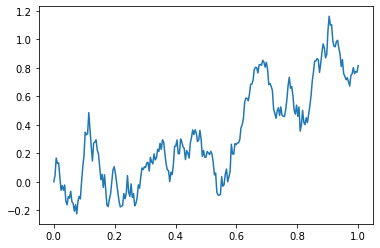

In [98]:
# Single Path
X = Simulate(X0 = 0,
             T = 1,
             N = 252)

plt.plot(X.keys(), X.values())

In [99]:
# Multiple Paths
X0 = 0
T = 5
N = 252
M = 100 # Number of paths
Xs = [Simulate(X0, T = T, N = N) for n in range (M)]

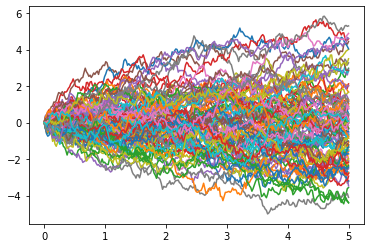

In [100]:
for X in Xs:
    plt.plot(X.keys(), X.values())

In [88]:
# Black Scholes
mu = 0.05
sigma = 0.2
T = 5

a = lambda x, t: mu * x
b = lambda x, t: sigma * x

Ss = [Simulate(X0 = 100, T = T, N = N) for n in range(M)]

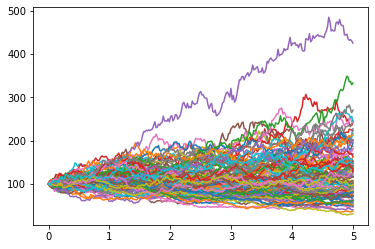

In [89]:
for S in Ss:
    plt.plot(S.keys(), S.values())

### Risk Neutral Valuation
$$ V_0 = \mathbb{E}_{\mathbb{Q}}\left[e^{-rT}H_T\right] $$

In [90]:
# European Call Option
def EuropeanCallPayoff(x, K):
    '''Payoff'''
    if x > K:
        return x - K
    else:
        return 0

    
def EuropeanCallMC(S0, K, T, r, sigma, N, M):
    paths = [Simulate(S0, T, N) for n in range(M)]
    Hs = [EuropeanCallPayoff(list(path.values())[-1], K) for path in paths]
    avg = np.mean(Hs)
    df = np.exp(-r * T)
    price = avg * df
    return price

from scipy.stats import norm
N = norm.cdf

def EuropeanCallBS(S0, K, T, r, sigma):
    d1 = (np.log(S0/K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * N(d1) - K * np.exp(-r * T) * N(d2)

In [91]:
EuropeanCallMC(S0 = 100,
               T = 1,
               N = 252,
               M = 1000,
               K = 100,
               r = 0.05,
               sigma = 0.2)

10.099840840732071

In [92]:
EuropeanCallBS(S0 = 100,
               T = 1,
               K = 100,
               r = 0.05,
              sigma = 0.2)

10.450583572185565